In [ ]:
!pip -q install langchain
!pip -q install langchain_community
!pip -q install streamlit
!pip -q install langchain_experimental
!pip -q install sentence-transformers
!pip -q install langchain_chroma
!pip -q install langchainhub
!pip -q install unstructured

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.

In [ ]:
!pip install langchain chromadb pymupdf tiktoken google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.9 MB/s eta 0:00:00


In [ ]:
!pip -q install langchain-google-genai
!pip -q install python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.1/420.1 kB 24.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.4 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.17 which is incompatible.


In [ ]:
import streamlit as st
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_chroma import Chroma
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain.document_loaders import DirectoryLoader
from langchain_community.document_loaders import PyPDFLoader
import chromadb.api
chromadb.api.client.SharedSystemClient.clear_system_cache()

In [ ]:
import os
import kagglehub

# Change the working directory to a folder on C:
os.chdir("/content")

# Download the dataset
path = kagglehub.dataset_download("ppb00x/deepmind-research-papers")

print("Path to dataset files:", path)

100%|██████████| 2.31G/2.31G [00:35<00:00, 70.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ppb00x/deepmind-research-papers/versions/2


In [ ]:
mkdir -p /content/deepmind-research-papers


In [ ]:
!ls -1 /root/.cache/kagglehub/datasets/ppb00x/deepmind-research-papers/versions/2 | wc -l

855


In [ ]:
!ls -t /root/.cache/kagglehub/datasets/ppb00x/deepmind-research-papers/versions/2/*.pdf | head -n 855 | xargs -I {} mv {} /content/deepmind-research-papers/

<h3><b> storing all data in pdf_files from folder</h3>

In [ ]:
# Set your PDF directory
pdf_dir = "/content/deepmind-research-papers/"

# Get all PDF files path not all pdfs in ram
pdf_files = [os.path.join(pdf_dir, f) for f in os.listdir(pdf_dir) if f.endswith(".pdf")]

# Initialize Google AI embeddings (or use OpenAIEmbeddings)
embedding = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

# ChromaDB storage path (to persist embeddings)
chroma_db_path = "/content/chromadb_store"


</h3><b>gemini api</h3>

In [ ]:
import os
os.environ["GOOGLE_API_KEY"] ="#####"


embedding = GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key=os.getenv("GOOGLE_API_KEY"))


<h3><b>Loading 10  pdf file at a time  in batch way to convert in documents</h3>

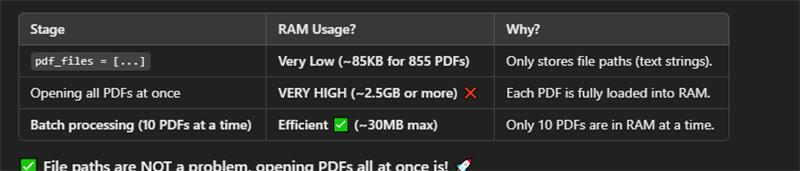

In [ ]:
import magic  # Detects file types
import os
from langchain.document_loaders import PyMuPDFLoader

def load_pdfs_in_batches(files, batch_size=10):
    """Loads only valid PDFs, skips invalid or corrupt files."""
    for i in range(0, len(files), batch_size):
        batch_files = files[i:i + batch_size]
        print(f"\n📂 Processing batch {i // batch_size + 1} / {len(files) // batch_size + 1} ...")

        docs = []
        for file in batch_files:
            try:
                # ✅ Check if the file is actually a PDF
                mime_type = magic.from_file(file, mime=True)
                if mime_type != "application/pdf":
                    print(f"⚠️ Skipping {file} (Not a PDF, detected as {mime_type})")
                    continue

                print(f"📄 Loading: {file}")
                loader = PyMuPDFLoader(file)
                file_docs = loader.load()
                docs.extend(file_docs)

            except Exception as e:
                print(f"❌ Error loading {file}: {e}")  # Skip bad files

        if not docs:
            print("⚠️ No valid documents in this batch! Skipping...")
            continue

        yield docs  # Yield each batch and its generateor which save meory as well


<h3><b> chunking</h3>

In [ ]:
def chunk_documents(doc_batch):
    """Splits documents into smaller chunks for better vector search."""
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    chunked_docs = text_splitter.split_documents(doc_batch)
    print(f"✅ Split into {len(chunked_docs)} chunks")
    return chunked_docs

<h3><b> Embedding and storing in chromadb</h3>

In [ ]:
def store_embeddings_in_batches(docs, batch_size=50):
    """
    Embeds documents in small batches and stores them in ChromaDB.
    """
    # Get the persistent client directly
    from langchain_chroma import Chroma
    persist_directory = "/content/chromadb_store" # Or your preferred path
    vectorstore = Chroma(persist_directory=persist_directory, embedding_function=embedding)


    for i in range(0, len(docs), batch_size):
        batch_docs = docs[i:i + batch_size]
        print(f"⚡ Embedding batch {i // batch_size + 1} ...")

        vectorstore.add_documents(batch_docs)  # Store embeddings

        # Persist is not available in Langchain's Chroma Class. so it was removed
        # Instead, data is saved when the vectorstore object is created using the persist_directory

    return vectorstore

<h3><b> Pipeline all 3 function in one using loop amzing way of batching</h3>

In [ ]:
for doc_batch in load_pdfs_in_batches(pdf_files, batch_size=10): #return 10 pdf file each iteration
    chunked_docs = chunk_documents(doc_batch) # 10 pdf file text chunks
    store_embeddings_in_batches(chunked_docs, batch_size=50)# 50 chuck at a time
    print("✅ Batch stored in ChromaDB")



📂 Processing batch 1 / 86 ...
📄 Loading: /content/deepmind-research-papers/1806.03863.pdf
📄 Loading: /content/deepmind-research-papers/2010.01374.pdf
📄 Loading: /content/deepmind-research-papers/2112.03753.pdf
📄 Loading: /content/deepmind-research-papers/2003.06350.pdf
📄 Loading: /content/deepmind-research-papers/1707.08817.pdf
📄 Loading: /content/deepmind-research-papers/2012.06161.pdf
📄 Loading: /content/deepmind-research-papers/2006.02419.pdf
📄 Loading: /content/deepmind-research-papers/2103.09016.pdf
📄 Loading: /content/deepmind-research-papers/2006.01782.pdf
📄 Loading: /content/deepmind-research-papers/2109.09740.pdf
✅ Split into 842 chunks
⚡ Embedding batch 1 ...
⚡ Embedding batch 2 ...
⚡ Embedding batch 3 ...
⚡ Embedding batch 4 ...
⚡ Embedding batch 5 ...
⚡ Embedding batch 6 ...
⚡ Embedding batch 7 ...
⚡ Embedding batch 8 ...
⚡ Embedding batch 9 ...
⚡ Embedding batch 10 ...
⚡ Embedding batch 11 ...
⚡ Embedding batch 12 ...
⚡ Embedding batch 13 ...
⚡ Embedding batch 14 ...
⚡ Em

<h3><b> accesing vector data from chromadb</h3>

In [ ]:
from langchain_chroma import Chroma
from langchain.embeddings import HuggingFaceEmbeddings

# Path where embeddings are saved
persist_directory = "/content/chromadb_store"



# Load the ChromaDB collection with the embedding function
vectorstore = Chroma(persist_directory=persist_directory, embedding_function=embedding)


<h3><b> retrieving meaning full result using vectordb and llm</h3>

In [ ]:

retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 10})

llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro",temperature=0.4,max_tokens=None,timeout=None) #  gemini-1.5-pro


query = st.chat_input("Ask me anything: ")
prompt = query

system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. keep  Answer pointwise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)


import ipywidgets as widgets
from IPython.display import display

# Create an input box
query_input = widgets.Text(
    value='',
    placeholder='Enter your question...',
    description='Query:',
    layout=widgets.Layout(width='70%')
)

# Create a button to run the query
run_button = widgets.Button(description="Run Query", button_style='success')

# Output area
output_area = widgets.Output()

def run_rag_application(_):
    query = query_input.value.strip()

    if query:
        question_answer_chain = create_stuff_documents_chain(llm, prompt)
        rag_chain = create_retrieval_chain(retriever, question_answer_chain)

        response = rag_chain.invoke({"input": query})

        # Invoke with return_source_documents=True--below we can add this para,meter for better pdf return output
        # response = rag_chain.invoke({"input": query}, return_source_documents=True) 

        # Display the answer
        with output_area:
            output_area.clear_output()  # Clear previous output
            print("\n💡 Answer:")
            print(response["answer"])

            # Display the relevant source PDFs
            retrieved_docs = response.get("context", [])  # Adjust based on your response structure
            sources = {doc.metadata.get("source") for doc in retrieved_docs}  # Remove duplicates
            #we can also use for accessing source file
            # sources = {doc.metadata['source'] for doc in llm_response["source_documents"]}
            # for source in sources:
            #     print(source)
            print("\n📂 Relevant Source PDFs:")
            print(sources)

# Bind function to button
run_button.on_click(run_rag_application)

# Display input box, button, and output
display(query_input, run_button, output_area)





2025-03-31 15:36:56.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-31 15:36:56.786 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-31 15:36:56.789 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-31 15:36:56.790 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-31 15:36:56.790 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Text(value='', description='Query:', layout=Layout(width='70%'), placeholder='Enter your question...')

Button(button_style='success', description='Run Query', style=ButtonStyle())

Output()

In [ ]:
st.title("RAG Application using Gemini Pro")
if query:
    question_answer_chain = create_stuff_documents_chain(llm, prompt)
    rag_chain = create_retrieval_chain(retriever, question_answer_chain)

    response = rag_chain.invoke({"input": query})
    print(response["answer"])


    # Display the relevant source PDFs
    retrieved_docs = response.get("context", [])  # This depends on your RAG output structure
    sources = {doc.metadata.get("source") for doc in retrieved_docs}  # Use a set to remove duplicates
    st.write("Relevant Source PDFs:", sources)

In [ ]:
!wget -q -O - https://loca.lt/mytunnelpassword

34.75.220.122

In [ ]:
!streamlit run /content/app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /content/app.py
⠙⠹⠸⠼⠴⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


In [ ]:
!wget -q -O - https://loca.lt/mytunnelpassword

35.196.101.221